<a href="https://colab.research.google.com/github/vimesh630/ML_CW/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and Google Drive Mounting

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Preprocessed Data

In [2]:
# Load preprocessed data
train_data_path = '/content/drive/My Drive/ML Coursework/Preprocessed Dataset/X_train.csv'
test_data_path = '/content/drive/My Drive/ML Coursework/Preprocessed Dataset/X_test.csv'

y_train_path = '/content/drive/My Drive/ML Coursework/Preprocessed Dataset/y_train.csv'
y_test_path = '/content/drive/My Drive/ML Coursework/Preprocessed Dataset/y_test.csv'

# Load data
X_train = pd.read_csv(train_data_path).values
X_test = pd.read_csv(test_data_path).values
y_train = pd.read_csv(y_train_path).values.ravel()
y_test = pd.read_csv(y_test_path).values.ravel()

X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Ensure target variables are reshaped correctly
y_train = y_train.ravel()
y_test = y_test.ravel()

# Check for NaN or invalid values
print("Check for NaN in X_train:", np.isnan(X_train).sum())
print("Check for NaN in y_train:", np.isnan(y_train).sum())
print("Check for NaN in X_test:", np.isnan(X_test).sum())
print("Check for NaN in y_test:", np.isnan(y_test).sum())

Check for NaN in X_train: 0
Check for NaN in y_train: 0
Check for NaN in X_test: 0
Check for NaN in y_test: 0


Define and Compile the Neural Network Model

In [3]:
# Define the neural network model
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),  # Input layer + Hidden layer 1
    BatchNormalization(),
    Dropout(0.4),                                              # Dropout for regularization
    Dense(128, activation='relu'),                             # Hidden layer 2
    BatchNormalization(),
    Dropout(0.3),                                              # Dropout for regularization
    Dense(64, activation='relu'),                              # Hidden layer 3
    Dense(1, activation='sigmoid')                             # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the Model

In [4]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=40,                 # Reduced number of epochs
                    batch_size=64,             # Larger batch size
                    validation_split=0.2,      # Use 20% of training data for validation
                    verbose=1)                 # Display training progress

Epoch 1/40
805/805 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8568 - loss: 0.3370 - val_accuracy: 0.9028 - val_loss: 0.2388
Epoch 2/40
805/805 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8962 - loss: 0.2548 - val_accuracy: 0.9067 - val_loss: 0.2179
Epoch 3/40
805/805 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9031 - loss: 0.2370 - val_accuracy: 0.9119 - val_loss: 0.2099
Epoch 4/40
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9075 - loss: 0.2269 - val_accuracy: 0.9148 - val_loss: 0.2032
Epoch 5/40
805/805 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9136 - loss: 0.2152 - val_accuracy: 0.9175 - val_loss: 0.1999
Epoch 6/40
805/805 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9152 - loss: 0.2087 - val_accuracy: 0.9170 - val_loss: 0.1933
Epoch 7/40
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9147 - loss: 0.2084 - val_accuracy: 0.9186 - val_loss: 0.1923
Epoch 8/40
805/805 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9193 - loss: 0.2016 - val_accuracy: 0.

Evaluate and Display Accuracy Metrics

In [5]:
# Predict and evaluate performance
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
train_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]
test_accuracy = (y_test == y_pred.flatten()).mean()

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {validation_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Accuracy: 0.94
Validation Accuracy: 0.94
Test Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94      8015
         1.0       0.92      0.97      0.94      8072

    accuracy                           0.94     16087
   macro avg       0.94      0.94      0.94     16087
weighted avg       0.94      0.94      0.94     16087


Confusion Matrix:
[[7313  702]
 [ 268 7804]]


# Visualizations

Training and Validation Accuracy/Loss

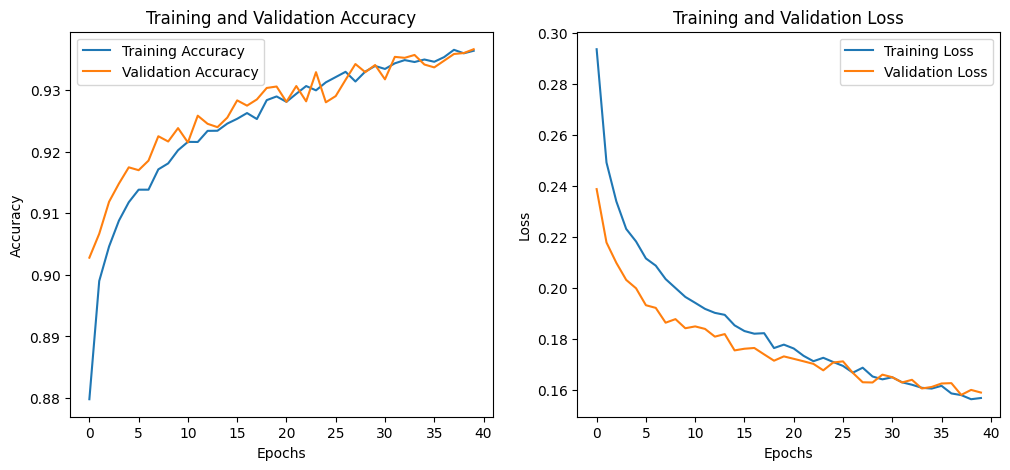

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Confusion Matrix

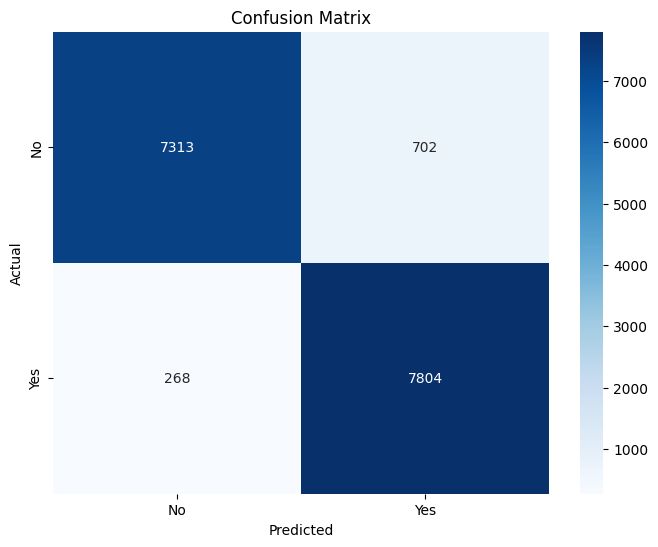

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC Curve

503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


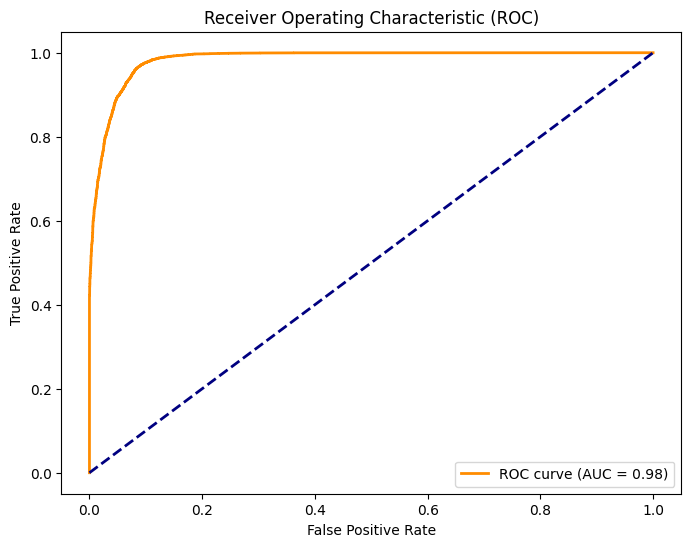

In [8]:
y_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curve

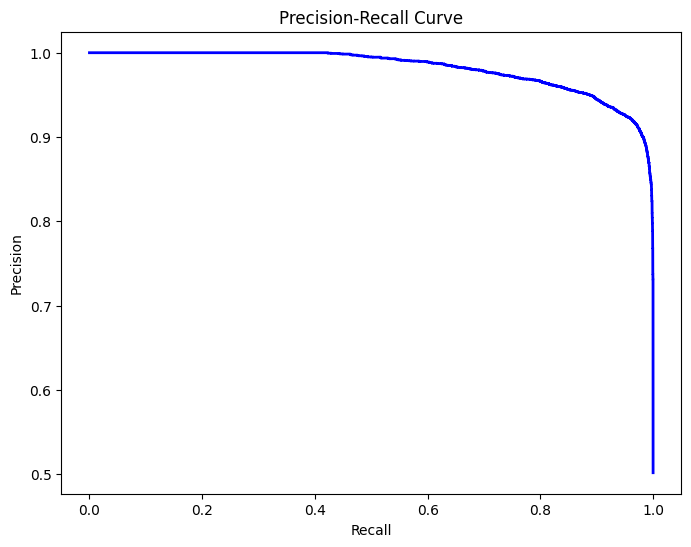

In [9]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Predictions for Sample Clients

In [10]:
# Predict probabilities for sample clients
sample_clients = X_test[:10]
predicted_probabilities = model.predict(sample_clients)
predicted_classes = (predicted_probabilities > 0.5).astype("int32")

print("Predicted Probabilities:\n", predicted_probabilities)
print("Predicted Classes (0 = No, 1 = Yes):\n", predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Probabilities:
 [[3.9218929e-05]
 [8.3980739e-02]
 [9.7211516e-01]
 [9.7149014e-01]
 [1.2371494e-07]
 [9.9999774e-01]
 [9.6383089e-01]
 [9.2490447e-01]
 [3.1834683e-05]
 [1.1115661e-01]]
Predicted Classes (0 = No, 1 = Yes):
 [[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]
